In [1]:
import pandas as pd


**train on random forest classification**

In [10]:

from pipeline.pipeline import pre_processing,gridsearch_metrics
import pandas as pd
data= pd.read_csv('dataset/employees_dataset.csv')
pipeline_rf,param_grid_rf,pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test= pre_processing(data)
print("Random forest: ")
gridsearch_metrics(pipeline_rf, param_grid_rf, X_train, X_test, y_train, y_test)
print("Logistique regression: ")
gridsearch_metrics(pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test)

Random forest: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8458049886621315
recall: 0.18181818181818182
f1score: 0.2916666666666667
Logistique regression: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8412698412698413
recall: 0.14285714285714285
f1score: 0.2391304347826087


**after applying RobustScaler()**


In [11]:
from pipeline.pipeline import pre_processing,gridsearch_metrics
import pandas as pd
data= pd.read_csv('dataset/employees_dataset.csv')
pipeline_rf,param_grid_rf,pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test= pre_processing(data)
print("Random forest: ")
gridsearch_metrics(pipeline_rf, param_grid_rf, X_train, X_test, y_train, y_test)
print("Logistique regression: ")
gridsearch_metrics(pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test)

Random forest: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8684807256235828
recall: 0.18032786885245902
f1score: 0.275
Logistique regression: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8775510204081632
recall: 0.21311475409836064
f1score: 0.325


**After using SMOTE**

In [1]:
from pipeline.pipeline import pre_processing,gridsearch_metrics
import pandas as pd
data= pd.read_csv('dataset/employees_dataset.csv')
pipeline_rf,param_grid_rf,pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test= pre_processing(data)
print("Random forest: ")
y_predict_proba_rf= gridsearch_metrics(pipeline_rf, param_grid_rf, X_train, X_test, y_train, y_test)
print("Logistique regression: ")
y_predict_proba_lr= gridsearch_metrics(pipeline_lr, param_grid_lr, X_train, X_test, y_train, y_test)



Random forest: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8707482993197279
recall: 0.25
f1score: 0.3870967741935484
Logistique regression: 
Fitting 5 folds for each of 4 candidates, totalling 20 fits
accuracy: 0.8639455782312925
recall: 0.3055555555555556
f1score: 0.4230769230769231


- **Comme notre dataset est déséquilibré, on a regardé surtout le recall et le F1-score pour choisir le modèle. La régression logistique a des valeurs plus élevées que Random Forest, donc on a décidé de l’enregistrer et de l’utiliser pour notre application.**

**Courbe ROC**

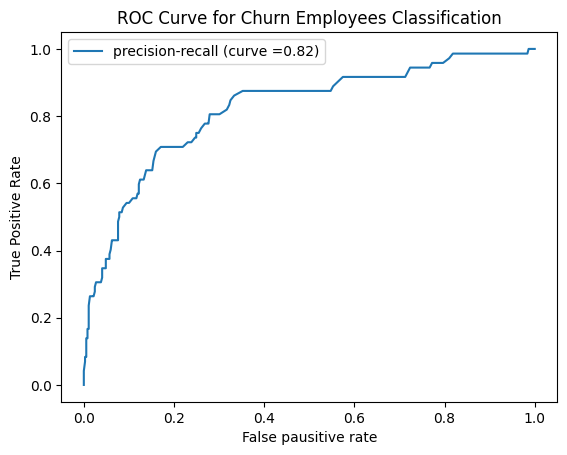

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr , thresholds=roc_curve(y_test, y_predict_proba_lr)
roc_auc= auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"precision-recall (curve ={roc_auc:.2f})")
plt.title('ROC Curve for Churn Employees Classification')
plt.xlabel('False pausitive rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


**Observation**

   - La courbe ROC montre des performances satisfaisantes du modèle car elle est proche du coin supérieur gauche du diagramme.
Cela indique un taux de vrais positifs élevé et un taux de faux positifs relativement faible.

   - Dans notre cas, l’AUC est de 0,82. Cette valeur, proche de 1 ce qui indique que le modèle sépare efficacement les classes.